In [224]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [225]:
# Read the CSV file
data_HTK = pd.read_csv("C:/Users/LENOVO/Desktop/ML/TAREA6/Medicaldataset.CSV")
# Convertir etiquetas de texto a valores numéricos
data_HTK['Result'] = np.where(data_HTK['Result'] == 'positive', 1, 0)  # 'positive' -> 1, 'negative' -> 0


In [226]:
vis=data_HTK.head() # Visualización General: Obtener una vista rápida de los datos.
print(vis)
#info de datos
info=data_HTK.info()
print(info)

   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin  Result  
0        160.0   1.80     0.012       0  
1        296.0   6.75     1.060       1  
2        270.0   1.99     0.003       0  
3        270.0  13.87     0.122       1  
4        300.0   1.08     0.003       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null 

In [227]:
#datos originales
print("Estadisticas Descriptivas Basicas datos originales")
b=data_HTK.describe() 
print (b)#IMPRIMIR ESTADISTICAS DESCRIPTIVAS

Estadisticas Descriptivas Basicas datos originales
               Age       Gender   Heart rate  Systolic blood pressure  \
count  1319.000000  1319.000000  1319.000000              1319.000000   
mean     56.191812     0.659591    78.336619               127.170584   
std      13.647315     0.474027    51.630270                26.122720   
min      14.000000     0.000000    20.000000                42.000000   
25%      47.000000     0.000000    64.000000               110.000000   
50%      58.000000     1.000000    74.000000               124.000000   
75%      65.000000     1.000000    85.000000               143.000000   
max     103.000000     1.000000  1111.000000               223.000000   

       Diastolic blood pressure  Blood sugar        CK-MB     Troponin  \
count               1319.000000  1319.000000  1319.000000  1319.000000   
mean                  72.269143   146.634344    15.274306     0.360942   
std                   14.033924    74.923045    46.327083     1.15456

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       8 non-null      float64
 1   Gender                    8 non-null      float64
 2   Heart rate                8 non-null      float64
 3   Systolic blood pressure   8 non-null      float64
 4   Diastolic blood pressure  8 non-null      float64
 5   Blood sugar               8 non-null      float64
 6   CK-MB                     8 non-null      float64
 7   Troponin                  8 non-null      float64
 8   Result                    8 non-null      float64
dtypes: float64(9)
memory usage: 640.0+ bytes
None


Text(0.5, 0.98, 'Distribucion original')

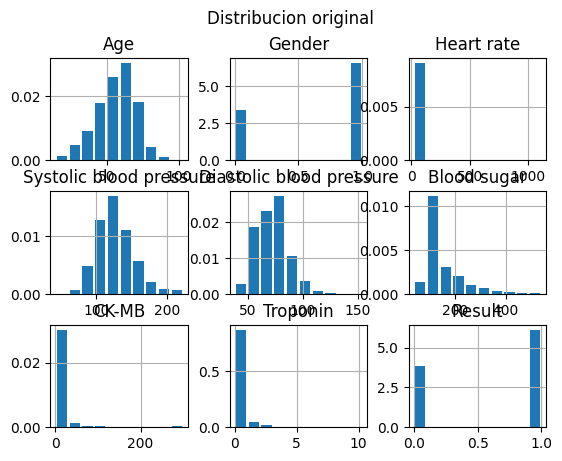

In [228]:
info=b.info()
print(info)
corr=data_HTK.corr()
#Visualización de Datos: - Histograma Para entender la distribución.
data_HTK.hist( density=True, histtype='barstacked', rwidth=0.8)#grafica fig1
plt.suptitle('Distribucion original')

Text(0.5, 1.0, 'datos originales')

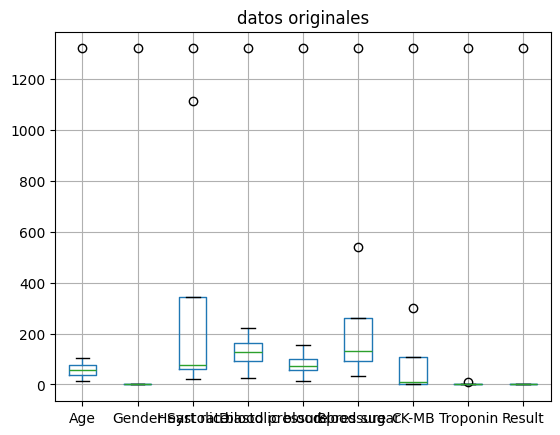

In [229]:
#Gráfico de caja (Boxplot): Para ver la dispersión y detectar valores atípicos.
plt.figure()
b.boxplot()#todos los datoa
plt.title('datos originales')


<Axes: >

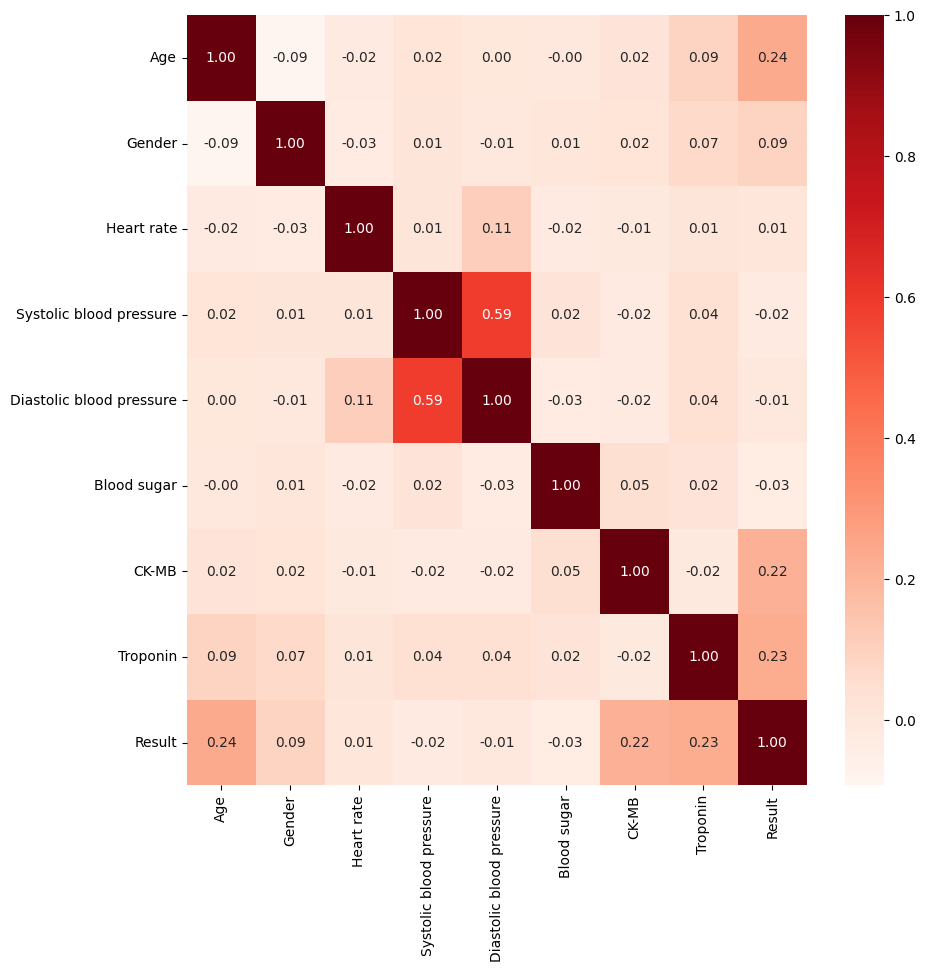

In [230]:
#grAFICO DE CORRELACION
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='Reds',fmt='.2f')

In [231]:
#seleccion de caracteristicas
data_HTK = data_HTK[["Age","CK-MB","Troponin","Result"]]
# --- Limpieza de datos
# En este caso, si hay valores nulos, se eliminan
data_HTK = data_HTK.dropna()

print(data_HTK.head())
print(data_HTK.describe())
print(data_HTK.info())
print(data_HTK.isnull().sum())  # Verificar valores nulos

   Age  CK-MB  Troponin  Result
0   64   1.80     0.012       0
1   21   6.75     1.060       1
2   55   1.99     0.003       0
3   64  13.87     0.122       1
4   55   1.08     0.003       0
               Age        CK-MB     Troponin       Result
count  1319.000000  1319.000000  1319.000000  1319.000000
mean     56.191812    15.274306     0.360942     0.614102
std      13.647315    46.327083     1.154568     0.486991
min      14.000000     0.321000     0.001000     0.000000
25%      47.000000     1.655000     0.006000     0.000000
50%      58.000000     2.850000     0.014000     1.000000
75%      65.000000     5.805000     0.085500     1.000000
max     103.000000   300.000000    10.300000     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1319 non-null   int64  
 1   CK-MB     1319 non-null   float64
 2   Troponin  1319 non-

Text(0.5, 0.98, 'Pairplot for Selected Columns')

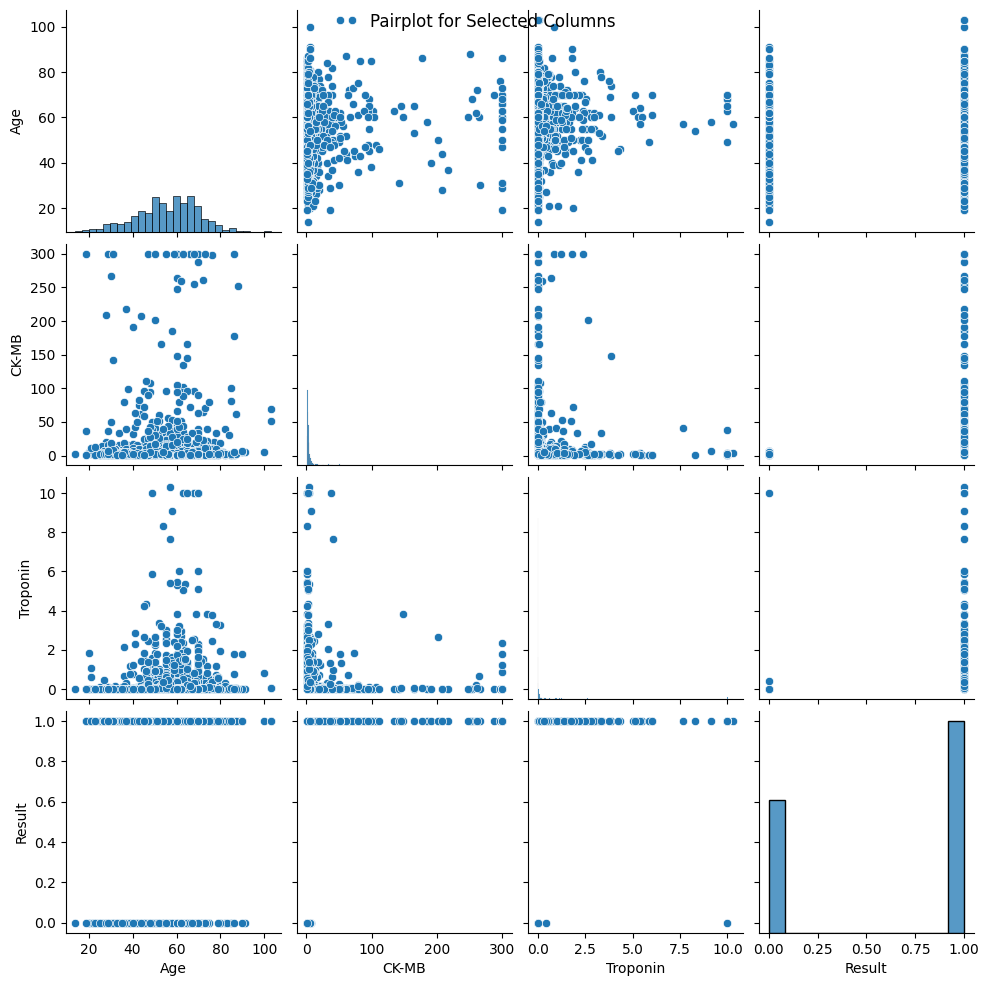

In [232]:
#grafico de dispersion
sns.pairplot(data_HTK)
plt.suptitle('Pairplot for Selected Columns')


In [233]:

# Separar dataset en características y variable objetivo
#X = data_HTK[["Age","Systolic blood pressure","Diastolic blood pressure","Blood sugar","CK-MB","Troponin"]]
X = data_HTK[["Age","CK-MB","Troponin"]]

# Convertir etiquetas de texto a valores numéricos
y = data_HTK['Result'] # 'positive' -> 1, 'negative' -> 0
# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
#MinMaxScaler()
#Normalizar los datos de entrenamiento
scaler.fit_transform(X_train)
X_train=scaler.transform(X_train)
#convertir a dataset nuevamente
X_train = pd.DataFrame(X_train, columns=["Age","CK-MB","Troponin"])

X_test=scaler.transform(X_test)
#convertir a dataset nuevamente
X_test = pd.DataFrame(X_test, columns=["Age","CK-MB","Troponin"])
#gurdar normalizador
joblib.dump(scaler, "normalizador.pkl")









['normalizador.pkl']

REGRESIÓN LOGISTICA

Logistic Regression cv: 0.832150 (0.035438)
regresion logistica con CV
              precision    recall  f1-score   support

    negative       0.75      0.78      0.77       155
    positive       0.86      0.83      0.84       241

    accuracy                           0.81       396
   macro avg       0.80      0.81      0.81       396
weighted avg       0.81      0.81      0.81       396



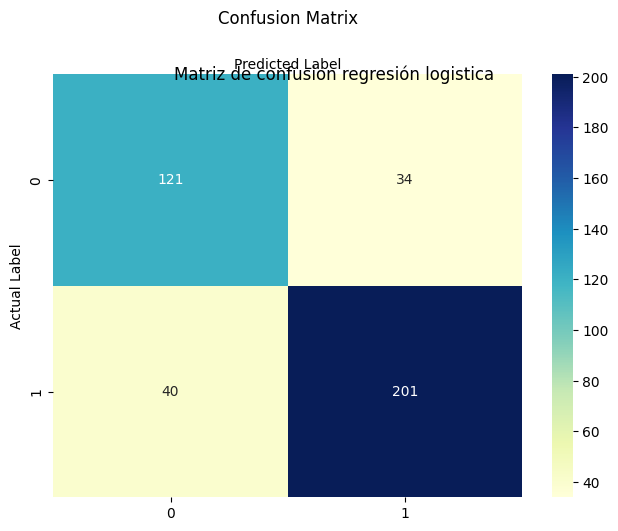

In [234]:
from sklearn import model_selection
######Regresión logistica con CV
# Instanciar el modelo
logreg = LogisticRegression(random_state=16,penalty='l2',C= 2.5, dual= False, max_iter= 130)
# Ajustar el modelo 
logreg.fit(X_train, y_train)
name='Logistic Regression cv'
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = KFold(n_splits= 5 , shuffle= True , random_state= 0 )
cv_results = model_selection.cross_val_score(logreg, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)
y_pred  = logreg.predict(X_test)







# Matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Crear gráfico de matriz de confusión
class_names = [1, 0]  # Clases
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Crear heatmap
#plt.figure()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.suptitle('Matriz de confusion regresión logistica')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


# Reporte de clasificación}
print("regresion logistica con CV")
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))










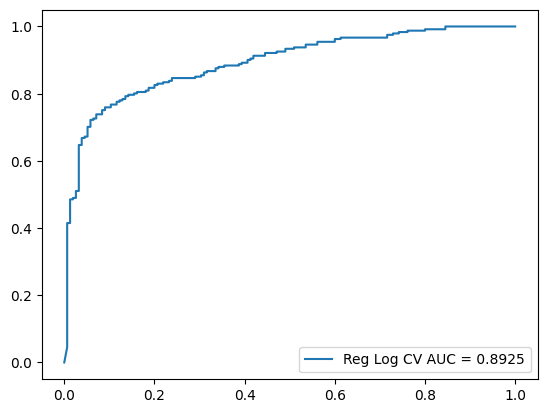

In [235]:

# Curva ROC

y_pred_proba = logreg.predict_proba(X_test)[:, 1]
# Nueva figura para evitar superposición
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = 'Reg Log CV AUC = %0.4f' % auc)
plt.legend(loc=4)




In [236]:
from sklearn.model_selection import GridSearchCV

dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

import time

lr = LogisticRegression(penalty='l2',C= 2.5, dual= False, max_iter= 130)
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

#También puedes definir una rejilla mayor de hiperparámetros y aplicar la búsqueda en rejilla.
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')


c:\Program Files\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Program Files\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Program Files\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    so

Best: 0.808195 using {'dual': False, 'max_iter': 100}
Execution time: 0.12196516990661621 ms
Best: 0.808195 using {'C': 2.5, 'dual': False, 'max_iter': 100}
Execution time: 0.22687625885009766 ms


c:\Program Files\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Program Files\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Program Files\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    s

In [237]:
#Volvamos a ejecutarlo todo, pero esta vez con la búsqueda aleatoria. Scikit-learn proporciona RandomSearchCV para hacerlo. Como de costumbre, tendrás que importar las dependencias necesarias para ello.


from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.808195 using {'max_iter': 100, 'dual': False, 'C': 2.5}
Execution time: 0.08475089073181152 ms


c:\Program Files\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Program Files\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Program Files\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    so

In [238]:
import joblib

# Guardar el modelo
joblib.dump(logreg, 'logreg_MODEL.pkl')

['logreg_MODEL.pkl']

In [239]:
# Cargar el scaler
scaler_cargado = joblib.load('logreg_MODEL.pkl')

In [240]:

# Predices
prediccion = scaler_cargado.predict(X_test)
print(prediccion)

[1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1
 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1
 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1
 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1
 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1
 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1
 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0]


NAIVE BAYES


🔵 Cross-Validation (KFold 3 folds)
Accuracy por fold:
[0.66590909 0.675      0.8952164 ]

Accuracy promedio cross-validation: 0.7454


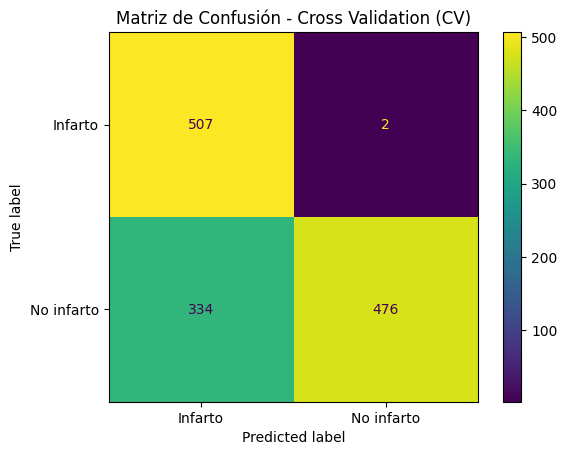


Reporte de Clasificación - Cross Validation (CV):
              precision    recall  f1-score   support

    negative       0.60      1.00      0.75       509
    positive       1.00      0.59      0.74       810

    accuracy                           0.75      1319
   macro avg       0.80      0.79      0.75      1319
weighted avg       0.84      0.75      0.74      1319


🟢 Evaluación clásica (Train/Test Split)

Accuracy en test set: 0.9091


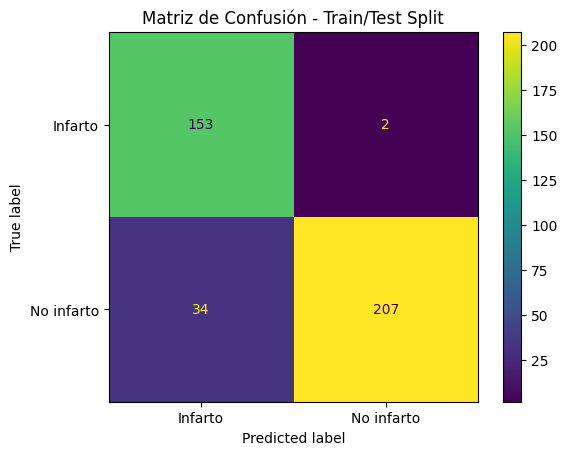


Reporte de Clasificación - Train/Test Split:
              precision    recall  f1-score   support

    negative       0.82      0.99      0.89       155
    positive       0.99      0.86      0.92       241

    accuracy                           0.91       396
   macro avg       0.90      0.92      0.91       396
weighted avg       0.92      0.91      0.91       396



In [241]:
# Importar librerías necesarias
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 🔵 1. Cross-Validation Evaluation
print("🔵 Cross-Validation (KFold 3 folds)")

# Definir modelo para cross-validation
model_cv = GaussianNB(var_smoothing=np.float64(1.519911082952933e-09))

# Definir KFold
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

# cross_val_score para accuracy
scores = cross_val_score(model_cv, X, y, cv=kfold, scoring='accuracy')

print("Accuracy por fold:")
print(scores)
print(f"\nAccuracy promedio cross-validation: {scores.mean():.4f}")

# cross_val_predict para predicciones
y_pred_cv = cross_val_predict(model_cv, X, y, cv=kfold)

# Matriz de confusión cross-validation
labels = ["Infarto", "No infarto"]
cm_cv = confusion_matrix(y, y_pred_cv)
disp_cv = ConfusionMatrixDisplay(confusion_matrix=cm_cv, display_labels=labels)
disp_cv.plot()
plt.title('Matriz de Confusión - Cross Validation (CV)')
plt.show()

# Reporte de clasificación - cross-validation
print("\nReporte de Clasificación - Cross Validation (CV):")
print(classification_report(y, y_pred_cv, target_names=["negative", "positive"]))

# -------------------------------------------------------------------

# 🟢 2. Train/Test Evaluation
print("\n🟢 Evaluación clásica (Train/Test Split)")

# Definir y entrenar el modelo (ya tienes tus X_train y X_test)
model_tt = GaussianNB(var_smoothing=np.float64(1.519911082952933e-09))
model_tt.fit(X_train, y_train)

# Predicciones en el test set
y_pred_test = model_tt.predict(X_test)

# Evaluar en test
acc_test = accuracy_score(y_test, y_pred_test)
print(f"\nAccuracy en test set: {acc_test:.4f}")

# Matriz de confusión Train/Test
cm_tt = confusion_matrix(y_test, y_pred_test)
disp_tt = ConfusionMatrixDisplay(confusion_matrix=cm_tt, display_labels=labels)
disp_tt.plot()
plt.title('Matriz de Confusión - Train/Test Split')
plt.show()

# Reporte clasificación Train/Test
print("\nReporte de Clasificación - Train/Test Split:")
print(classification_report(y_test, y_pred_test, target_names=["negative", "positive"]))

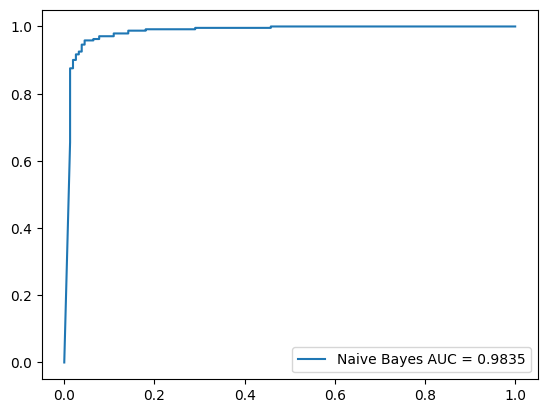

In [242]:
# Curva ROC

y_pred_proba = model_tt.predict_proba(X_test)[:, 1]
# Nueva figura para evitar superposición
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = 'Naive Bayes AUC = %0.4f' % auc)
plt.legend(loc=4)




In [243]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
param_grid_nb = { 'var_smoothing': np.logspace(0,-9, num=100)}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, n_jobs=-1)
#param_distributions=param_grid, cv = 3, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)


GaussianNB(var_smoothing=np.float64(4.3287612810830526e-07))


In [244]:
best_gcv = nbModel_grid.best_estimator_
#estimator.append(('gauss', best_gcv))
print(best_gcv)
print()
gauss_predict_roc = best_gcv.predict_proba(X_test)
gauss_predict = best_gcv.predict(X_test)
#print('roc_auc_score:', roc_auc_score(y_test, gauss_predict_roc, average="weighted", multi_class="ovr"))
print()
print(classification_report(y_test, gauss_predict))

GaussianNB(var_smoothing=np.float64(4.3287612810830526e-07))


              precision    recall  f1-score   support

           0       0.81      0.99      0.89       155
           1       0.99      0.85      0.92       241

    accuracy                           0.91       396
   macro avg       0.90      0.92      0.90       396
weighted avg       0.92      0.91      0.91       396



In [245]:
import joblib
# Guardar el modelo
joblib.dump(model_tt, 'GausianNB_MODEL.pkl')
# Cargar el scaler
scaler_cargadonb = joblib.load('GausianNB_MODEL.pkl')
# Predices
prediccion = scaler_cargadonb.predict(X_test)

KNN 

best_k  9
cross val score: 
Accuracy: 0.8181818181818182
Precision: 0.8930232558139535
Recall: 0.7966804979253111
cross validation knn
              precision    recall  f1-score   support

    negative       0.73      0.85      0.79       155
    positive       0.89      0.80      0.84       241

    accuracy                           0.82       396
   macro avg       0.81      0.82      0.81       396
weighted avg       0.83      0.82      0.82       396



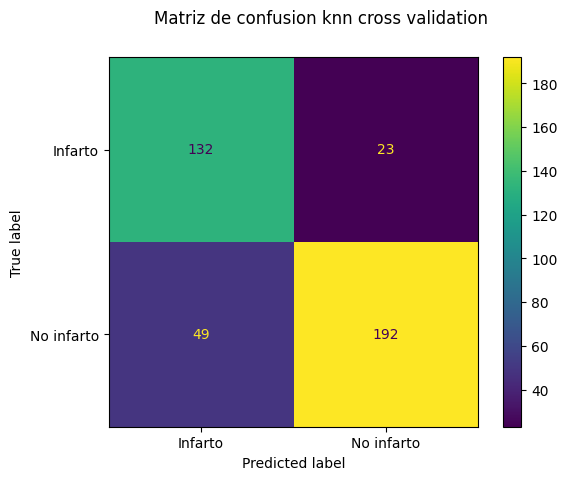

In [246]:
##Uso de la validación cruzada para obtener el mejor valor de k

k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k , leaf_size= 394, p= 2,algorithm="kd_tree", weights="distance")
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))


best_index = np.argmax(scores)
best_k = k_values[best_index]
print("best_k ", best_k)
knn = KNeighborsClassifier(n_neighbors=best_k, leaf_size= 394, p= 2,algorithm="kd_tree", weights="distance")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

labels = ["Infarto", "No infarto"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot();
plt.suptitle('Matriz de confusion knn cross validation')

print("cross val score: ")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)    
# Reporte de clasificación
target_names = ['negative', 'positive']
print("cross validation knn")
print(classification_report(y_test, y_pred, target_names=target_names))


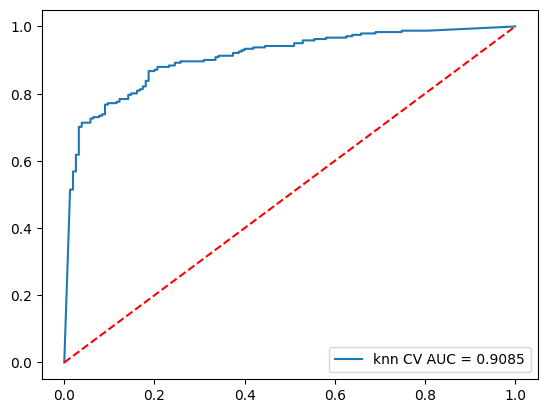

In [247]:


y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = roc_auc_score(y_test,  y_scores[:, 1])
#ROC_AUC = roc_auc_score(y_test, y_pred1)
#plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'knn CV AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')


In [248]:
import scipy
# CHERCHEZ FOR PARAMETERS
def cherchez(estimator, param_grid, search):
    """
    This is a helper function for tuning hyperparameters using teh two search methods.
    Methods must be GridSearchCV or RandomizedSearchCV.
    Inputs:
        estimator: Logistic regression, SVM, KNN, etc
        param_grid: Range of parameters to search
        search: Grid search or Randomized search
    Output:
        Returns the estimator instance, clf
    
    """   
    try:
        if search == "grid":
            clf = GridSearchCV(
                estimator=estimator, 
                param_grid=param_grid, 
                scoring=None,
                n_jobs=-1, 
                cv=10, 
                verbose=0,
                return_train_score=True
            )
        elif search == "random":           
            clf = RandomizedSearchCV(
                estimator=estimator,
                param_distributions=param_grid,
                n_iter=10,
                n_jobs=-1,
                cv=10,
                verbose=0,
                random_state=1,
                return_train_score=True
            )
    except:
        print('Search argument has to be "grid" or "random"')
        sys.exit(0)
        
    # Fit the Xmodel
    clf.fit(X=X_train, y=y_train)
    
    return clf  
# KNN
knn_param = {
    "n_neighbors": [i for i in range(1,30,5)],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1, 10, 30],
    "p": [1,2]
}

knn_dist = {
    "n_neighbors": scipy.stats.randint(1,33),
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": scipy.stats.randint(1,1000),
    "p": [1,2]
}

knn_grid = cherchez(KNeighborsClassifier(), knn_param, "grid")
acc = accuracy_score(y_true=y_test, y_pred=knn_grid.predict(X_test))
cfmatrix_grid = confusion_matrix(y_true=y_test, y_pred=knn_grid.predict(X_test))
print("**Grid search results**")
print("Best training accuracy:\t", knn_grid.best_score_)
print("Test accuracy:\t", acc)

knn_random = cherchez(KNeighborsClassifier(), knn_dist, "random")
acc = accuracy_score(y_true=y_test, y_pred=knn_random.predict(X_test))
cfmatrix_rand = confusion_matrix(y_true=y_test, y_pred=knn_random.predict(X_test))
print("**Random search results**")
print("Best training accuracy:\t", knn_random.best_score_)
print("Test accuracy:\t", acc)


random_result =knn_random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

**Grid search results**
Best training accuracy:	 0.871026180458158
Test accuracy:	 0.8383838383838383
**Random search results**
Best training accuracy:	 0.8450210378681626
Test accuracy:	 0.8181818181818182
Best: 0.753603 using {'algorithm': 'brute', 'leaf_size': 358, 'n_neighbors': 19, 'p': 1, 'weights': 'distance'}


In [249]:
import joblib
# Guardar el modelo
joblib.dump(knn, 'knn_MODEL.pkl')
# Cargar el scaler
scaler_cargadoknn = joblib.load('knn_MODEL.pkl')
# Predices
prediccion = scaler_cargadoknn.predict(X_test)
print(prediccion)

[1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1
 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1
 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1
 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1
 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0]


ARBOL DE DESICION

Accuracy: 0.9747474747474747
ARBOL DE DESICION: 
              precision    recall  f1-score   support

    negative       0.98      0.95      0.97       155
    positive       0.97      0.99      0.98       241

    accuracy                           0.97       396
   macro avg       0.98      0.97      0.97       396
weighted avg       0.97      0.97      0.97       396



Text(0.5, 0.98, 'Matriz de confusion  ARBOL DE DESICION')

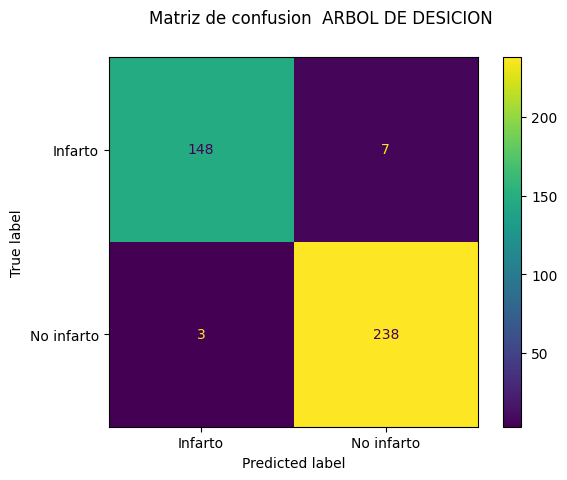

In [250]:

#Vamos a crear un modelo de árbol de decisión utilizando Scikit-learn.
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
#clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = DecisionTreeClassifier(criterion="entropy", max_depth= 5, max_features= None, max_leaf_nodes= None,min_samples_leaf= 1, min_samples_split= 2, min_weight_fraction_leaf=0.0, random_state= 4)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ARBOL DE DESICION: ")

# Reporte de clasificación
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))
#plt.figure()
labels = ["Infarto", "No infarto"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
plt.suptitle('Matriz de confusion  ARBOL DE DESICION')
#plt.figure()





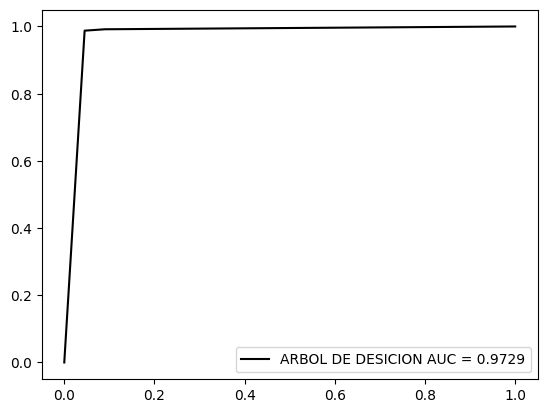

In [251]:
# Curva ROC

y_pred1 =clf.predict_proba(X_test)[:, 1]
# Nueva figura para evitar superposición
#plt.figure()
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred1)
auc = metrics.roc_auc_score(y_test,  y_pred1)
plt.plot(fpr, tpr, label='ARBOL DE DESICION AUC = %0.4f' % auc,color="black")
#plt.title('ROC curve for Gaussian Naive Bayes Classifier for Heart atack')
plt.legend(loc=4)



In [252]:
# Decision tree classifier
dtc_param = {
    "max_depth": [None],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "min_weight_fraction_leaf": [0.],
    "max_features": [None],
    "random_state": [4],
    "max_leaf_nodes": [None], # None = infinity or int
   
}


dtc_grid = cherchez(DecisionTreeClassifier(), dtc_param, "grid")
acc = accuracy_score(y_true=y_test, y_pred=dtc_grid.predict(X_test))
cfmatrix_grid = confusion_matrix(y_true=y_test, y_pred=dtc_grid.predict(X_test))
print("**Grid search results**")
print("Best training accuracy:\t", dtc_grid.best_score_)
print("Test accuracy:\t", acc)
random_result =dtc_grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

**Grid search results**
Best training accuracy:	 0.9837424029920523
Test accuracy:	 0.9722222222222222
Best: 0.972704 using {'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 4}


In [253]:
import joblib
# Guardar el modelo
joblib.dump(clf , 'ArbolDes_MODEL.pkl')
# Cargar el scaler
scaler_cargadoAD = joblib.load('ArbolDes_MODEL.pkl')
# Predices
prediccion = scaler_cargadoAD.predict(X_test)
print(prediccion)

[1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1
 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0
 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1
 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0
 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0]


SVM

In [254]:
from sklearn.svm import SVC
svm_linear  = SVC(kernel='linear',C= np.float64(0.0053960583725918545), gamma= np.float64(0.012741252530133043), random_state= 1)
svm_linear.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm_linear.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6136363636363636


              precision    recall  f1-score   support

    negative       1.00      0.01      0.03       155
    positive       0.61      1.00      0.76       241

    accuracy                           0.61       396
   macro avg       0.81      0.51      0.39       396
weighted avg       0.76      0.61      0.47       396



Text(0.5, 0.98, 'Matriz de confusion  SVM')

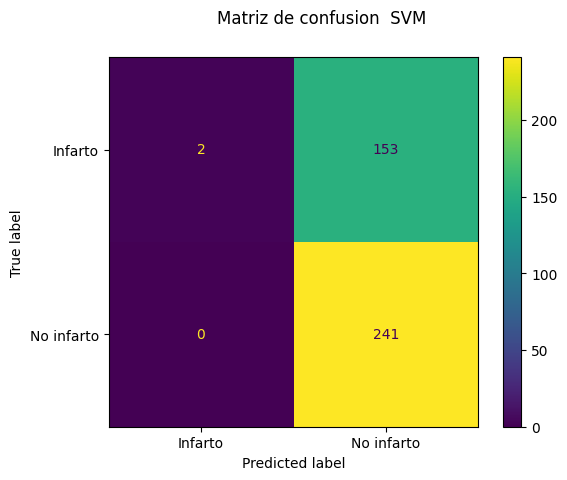

In [255]:
# Reporte de clasificación
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))
#plt.figure()
labels = ["Infarto", "No infarto"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
plt.suptitle('Matriz de confusion  SVM')
#plt.figure()


In [256]:
# SVM
svm_param = {
    "C": [.01, .1, 1, 5, 10, 100],
    "gamma": [0, .01, .1, 1, 5, 10, 100],
    "kernel": ["rbf"],
    "random_state": [1]
}

svm_dist = {
    "C": scipy.stats.expon(scale=.01),
    "gamma": scipy.stats.expon(scale=.01),
    "kernel": ["rbf"],
    "random_state": [1]
}

svm_grid = cherchez(SVC(), svm_param, "grid")
acc = accuracy_score(y_true=y_test, y_pred=svm_grid.predict(X_test))
cfmatrix_grid = confusion_matrix(y_true=y_test, y_pred=svm_grid.predict(X_test))
print("**Grid search results**")
print("Best training accuracy:\t", svm_grid.best_score_)
print("Test accuracy:\t", acc)

svm_random = cherchez(SVC(), svm_dist, "random")
acc = accuracy_score(y_true=y_test, y_pred=svm_random.predict(X_test))
cfmatrix_rand = confusion_matrix(y_true=y_test, y_pred=svm_random.predict(X_test))
print("**Random search results**")
print("Best training accuracy:\t", svm_random.best_score_)
print("Test accuracy:\t", acc)

random_result =svm_random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))



**Grid search results**
Best training accuracy:	 0.9523024777933614
Test accuracy:	 0.9292929292929293
**Random search results**
Best training accuracy:	 0.6164796633941094
Test accuracy:	 0.6085858585858586
Best: 0.614105 using {'C': np.float64(0.0053960583725918545), 'gamma': np.float64(0.012741252530133043), 'kernel': 'rbf', 'random_state': 1}


In [257]:
import joblib
# Guardar el modelo
joblib.dump(svm_linear, 'svm_linear_MODEL.pkl')
# Cargar el scaler
scaler_cargadosvm = joblib.load('svm_linear_MODEL.pkl')
# Predices
prediccion = scaler_cargadosvm.predict(X_test)
print(prediccion)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


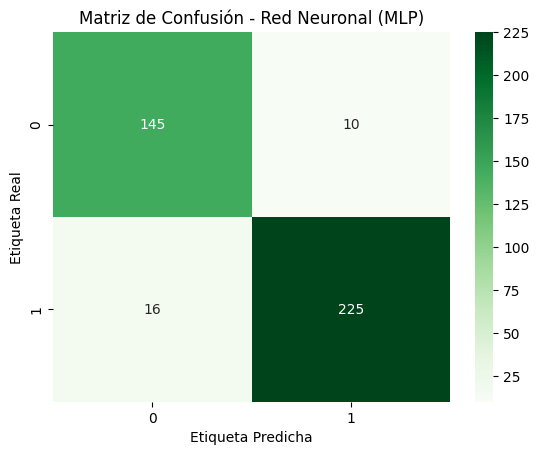

Modelo Red Neuronal (MLP):
              precision    recall  f1-score   support

    negative       0.90      0.94      0.92       155
    positive       0.96      0.93      0.95       241

    accuracy                           0.93       396
   macro avg       0.93      0.93      0.93       396
weighted avg       0.94      0.93      0.93       396



In [258]:
from sklearn.neural_network import MLPClassifier

# Crear el modelo
"""
mlp = MLPClassifier(hidden_layer_sizes=(100,),  # 1 capa oculta con 100 neuronas
                    activation='relu',          # función de activación
                    solver='adam',               # optimizador
                    max_iter=500,                # número máximo de épocas
                    random_state=42)
"""

mlp = MLPClassifier( activation='tanh',
                     alpha= 0.0001,
                     hidden_layer_sizes=(100, 50), 
                     learning_rate='constant', 
                     max_iter=500, 
                     random_state=42,
                     solver= 'adam')





# Entrenar el modelo
mlp.fit(X_train, y_train)

# Predecir
y_pred_mlp = mlp.predict(X_test)

# Matriz de confusión
cnf_matrix_mlp = metrics.confusion_matrix(y_test, y_pred_mlp)

# Gráfica de matriz
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.heatmap(cnf_matrix_mlp, annot=True, cmap="Greens", fmt='g')
plt.title('Matriz de Confusión - Red Neuronal (MLP)')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

# Reporte de clasificación
print("Modelo Red Neuronal (MLP):")
print(classification_report(y_test, y_pred_mlp, target_names=['negative', 'positive']))

# Guardar métricas
mlp_accuracy = metrics.accuracy_score(y_test, y_pred_mlp)
mlp_precision = metrics.precision_score(y_test, y_pred_mlp)
mlp_recall = metrics.recall_score(y_test, y_pred_mlp)
mlp_f1 = metrics.f1_score(y_test, y_pred_mlp)

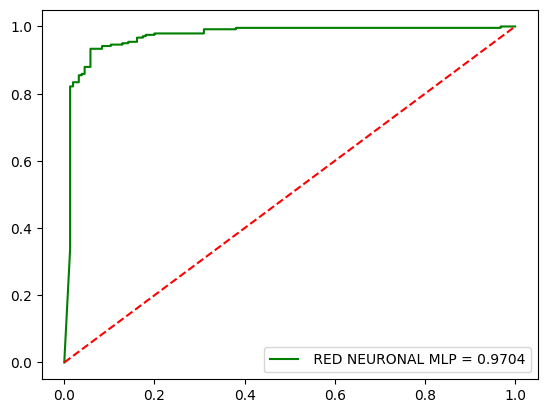

In [259]:
# Curva ROC




y_scores = mlp.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = roc_auc_score(y_test,  y_scores[:, 1])
#ROC_AUC = roc_auc_score(y_test, y_pred1)
#plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = ' RED NEURONAL MLP = %0.4f' % roc_auc,color="green")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')



In [260]:
# Definir la grilla de hiperparámetros a probar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100,50), (50,30,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],  # regularización L2
    'learning_rate': ['constant', 'adaptive'],
}

# Definir el GridSearchCV
grid_search = GridSearchCV(estimator=mlp,
                           param_grid=param_grid,
                           cv=5,            # 5-fold cross-validation
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)       # Usa todos los cores para hacerlo rápido

# Entrenar GridSearch
grid_search.fit(X_train, y_train)

# Mostrar el mejor conjunto de hiperparámetros
print("Mejores Hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mejor modelo encontrado
best_mlp = grid_search.best_estimator_

# Evaluar en test set
y_pred_best_mlp = best_mlp.predict(X_test)

# Reporte de clasificación
print("\nReporte de Clasificación del Mejor Modelo:")
print(metrics.classification_report(y_test, y_pred_best_mlp))


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Mejores Hiperparámetros encontrados:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}

Reporte de Clasificación del Mejor Modelo:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       155
           1       0.96      0.96      0.96       241

    accuracy                           0.95       396
   macro avg       0.95      0.95      0.95       396
weighted avg       0.95      0.95      0.95       396



In [261]:

# ===============================
# Guardar el modelo entrenado
# ===============================

# Guardar el modelo MLP en un archivo .pkl
joblib.dump(mlp, 'modelo_red_neuronal_mlp.pkl')

# (Si no guardaste el scaler antes, aquí también:)
# Guardar el StandardScaler usado en el preprocesamiento
joblib.dump(scaler, 'scaler_standard.pkl')

print("✅ Modelo MLP y scaler guardados correctamente.")


✅ Modelo MLP y scaler guardados correctamente.


In [262]:
# Cargar el scaler
scaler_cargadomlp = joblib.load('modelo_red_neuronal_mlp.pkl')
# Predices
prediccion = scaler_cargadomlp.predict(X_test)
print(prediccion)

[1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0
 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1
 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0]


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores Hiperparámetros encontrados (Random Search):
{'activation': 'logistic', 'alpha': np.float64(0.004334014807063697), 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}

Reporte de Clasificación del Mejor Modelo (Random Search):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       155
           1       0.95      0.97      0.96       241

    accuracy                           0.95       396
   macro avg       0.95      0.95      0.95       396
weighted avg       0.95      0.95      0.95       396



c:\Program Files\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


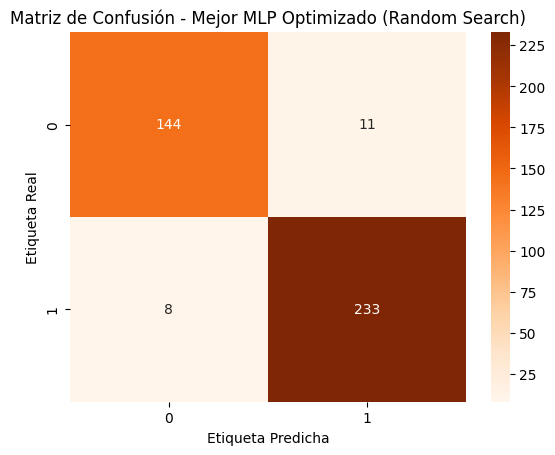


Métricas finales:
Accuracy: 0.9520
Precision: 0.9549
Recall: 0.9668
F1 Score: 0.9608
✅ Mejor modelo MLP (Random Search) guardado correctamente.


In [263]:

from scipy.stats import randint, uniform



# Definir el espacio de hiperparámetros
param_distributions = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (100, 50), (50, 30, 10)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': uniform(0.0001, 0.01),  # valores aleatorios entre 0.0001 y 0.0101
    'learning_rate': ['constant', 'adaptive'],
}

# Definir RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=mlp,
                                   param_distributions=param_distributions,
                                   n_iter=30,            # Número de combinaciones a probar
                                   cv=5,                 # 5-fold cross-validation
                                   scoring='accuracy',
                                   random_state=42,
                                   verbose=2,
                                   n_jobs=-1)

# Entrenar RandomizedSearchCV
random_search.fit(X_train, y_train)

# Mostrar el mejor conjunto de hiperparámetros
print("Mejores Hiperparámetros encontrados (Random Search):")
print(random_search.best_params_)

# Mejor modelo encontrado
best_random_mlp = random_search.best_estimator_

# Evaluar en test set
y_pred_random_mlp = best_random_mlp.predict(X_test)

# Reporte de clasificación
print("\nReporte de Clasificación del Mejor Modelo (Random Search):")
print(metrics.classification_report(y_test, y_pred_random_mlp))

# Matriz de confusión
fig, ax = plt.subplots()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_random_mlp), annot=True, cmap="Oranges", fmt='g')
plt.title('Matriz de Confusión - Mejor MLP Optimizado (Random Search)')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

# Calcular métricas
random_mlp_accuracy = metrics.accuracy_score(y_test, y_pred_random_mlp)
random_mlp_precision = metrics.precision_score(y_test, y_pred_random_mlp)
random_mlp_recall = metrics.recall_score(y_test, y_pred_random_mlp)
random_mlp_f1 = metrics.f1_score(y_test, y_pred_random_mlp)

print("\nMétricas finales:")
print(f"Accuracy: {random_mlp_accuracy:.4f}")
print(f"Precision: {random_mlp_precision:.4f}")
print(f"Recall: {random_mlp_recall:.4f}")
print(f"F1 Score: {random_mlp_f1:.4f}")

# Guardar el mejor modelo
joblib.dump(best_random_mlp, 'mejor_modelo_random_mlp.pkl')

print("✅ Mejor modelo MLP (Random Search) guardado correctamente.")

In [264]:
# --- Crear tabla comparativa de accuracies
model_results = {
    'Modelo': ['Logistic Regression','Gaussian NB', 'Decision Tree', 'KNN', 'SVC', 'Neural Network'],
    'Accuracy en Train': [logreg.score(X_train, y_train),
                          model_tt.score(X_train, y_train),
                          clf.score(X_train, y_train),
                          knn.score(X_train, y_train),
                          svm_linear.score(X_train, y_train),
                          best_random_mlp.score(X_train, y_train)],
    'Accuracy en Test': [logreg.score(X_test, y_test),
                         model_tt.score(X_test, y_test),
                         clf.score(X_test, y_test),
                         knn.score(X_test, y_test),
                         svm_linear.score(X_test, y_test),
                         best_random_mlp.score(X_test, y_test)]
                    
}

import pandas as pd
results_df = pd.DataFrame(model_results)
display(results_df)

,Modelo,Accuracy en Train,Accuracy en Test
0,Logistic Regression,0.835320,0.813131
1,Gaussian NB,0.917660,0.909091
2,Decision Tree,0.993499,0.974747
3,KNN,1.000000,0.818182
4,SVC,0.624052,0.613636
5,Neural Network,0.979415,0.952020


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16052\2638537910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy en Test', y='Modelo', data=results_df, palette='viridis')


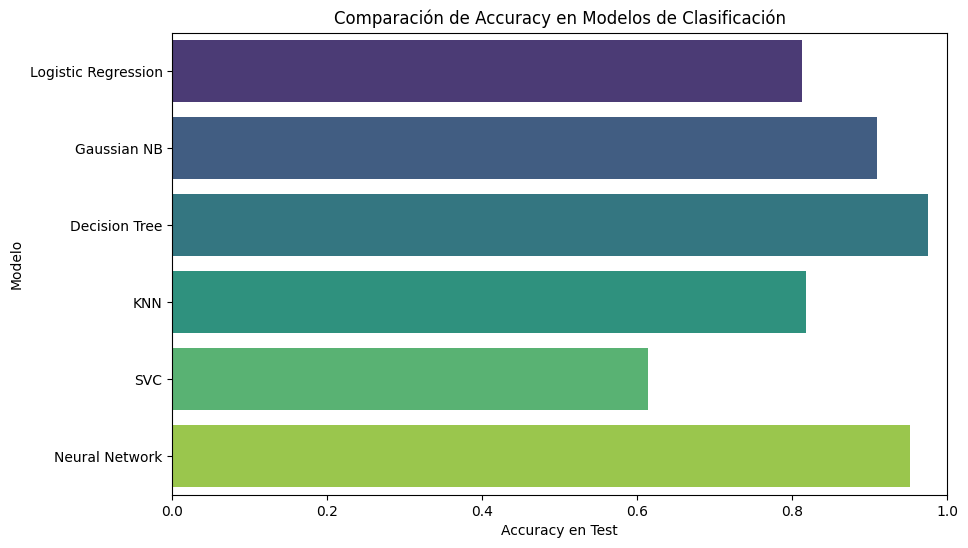

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Accuracy en Test', y='Modelo', data=results_df, palette='viridis')
plt.title('Comparación de Accuracy en Modelos de Clasificación')
plt.xlim(0, 1)
plt.show()

# --- Calcular curvas ROC para TRAIN ---

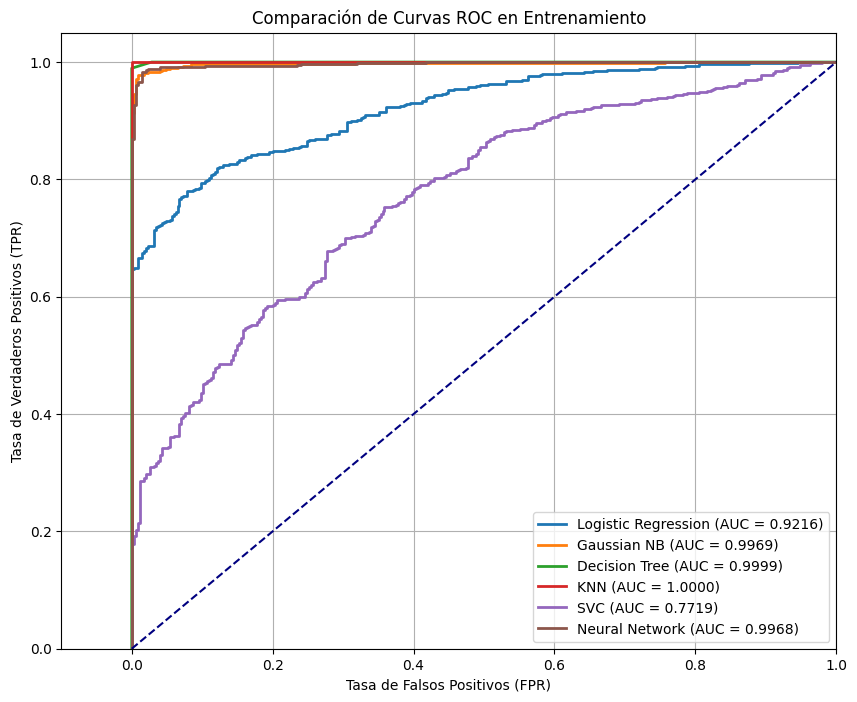

In [266]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --- Calcular curvas ROC para TRAIN ---
fpr_train = {}
tpr_train = {}
roc_auc_train = {}

# Logistic Regression
y_score = logreg.predict_proba(X_train)[:,1]
fpr_train['Logistic Regression'], tpr_train['Logistic Regression'], _ = roc_curve(y_train, y_score)
roc_auc_train['Logistic Regression'] = auc(fpr_train['Logistic Regression'], tpr_train['Logistic Regression'])

# Gaussian NB
y_score = model_tt.predict_proba(X_train)[:,1]
fpr_train['Gaussian NB'], tpr_train['Gaussian NB'], _ = roc_curve(y_train, y_score)
roc_auc_train['Gaussian NB'] = auc(fpr_train['Gaussian NB'], tpr_train['Gaussian NB'])

# Decision Tree
y_score = clf.predict_proba(X_train)[:,1]
fpr_train['Decision Tree'], tpr_train['Decision Tree'], _ = roc_curve(y_train, y_score)
roc_auc_train['Decision Tree'] = auc(fpr_train['Decision Tree'], tpr_train['Decision Tree'])

# KNN
y_score = knn.predict_proba(X_train)[:,1]
fpr_train['KNN'], tpr_train['KNN'], _ = roc_curve(y_train, y_score)
roc_auc_train['KNN'] = auc(fpr_train['KNN'], tpr_train['KNN'])

# SVC
y_score = svm_linear.decision_function(X_train)
fpr_train['SVC'], tpr_train['SVC'], _ = roc_curve(y_train, y_score)
roc_auc_train['SVC'] = auc(fpr_train['SVC'], tpr_train['SVC'])

# Neural Network
y_score = best_random_mlp.predict_proba(X_train)[:,1]
fpr_train['Neural Network'], tpr_train['Neural Network'], _ = roc_curve(y_train, y_score)
roc_auc_train['Neural Network'] = auc(fpr_train['Neural Network'], tpr_train['Neural Network'])

# --- Graficar todas las curvas ROC en TRAIN ---
plt.figure(figsize=(10,8))

for model in fpr_train.keys():
    plt.plot(fpr_train[model], tpr_train[model], lw=2, label=f'{model} (AUC = {roc_auc_train[model]:.4f})')

plt.plot([0,1], [0,1], color='navy', linestyle='--')  # Línea base
plt.xlim([-0.10, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC en Entrenamiento')
plt.legend(loc='lower right')
plt.grid()
plt.show()



# --- Calcular curvas ROC para cada modelo  TEST---

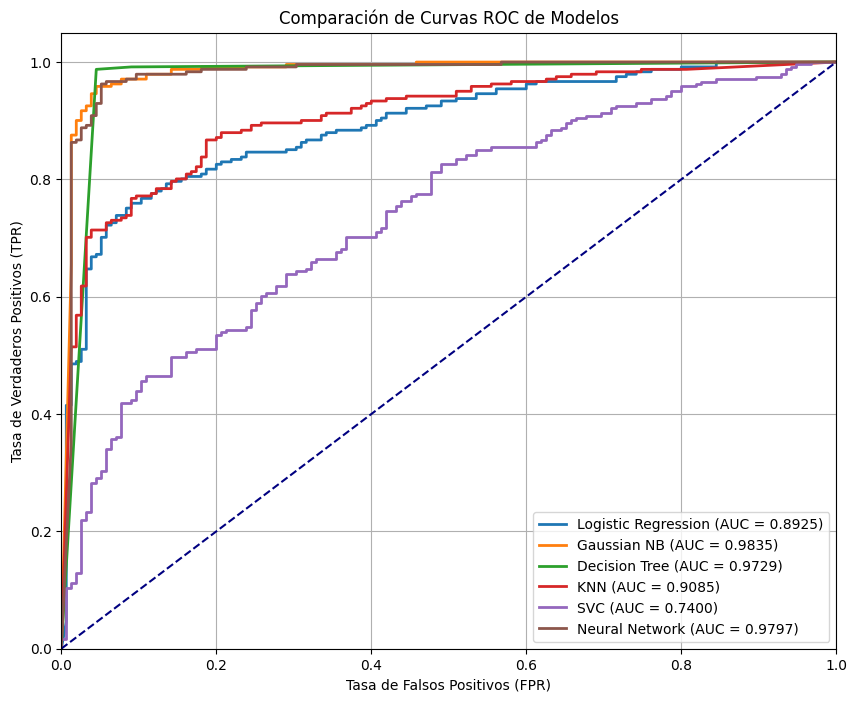

In [267]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --- Calcular curvas ROC para cada modelo ---
fpr = {}
tpr = {}
roc_auc = {}

# Logistic Regression
y_score = logreg.predict_proba(X_test)[:,1]
fpr['Logistic Regression'], tpr['Logistic Regression'], _ = roc_curve(y_test, y_score)
roc_auc['Logistic Regression'] = auc(fpr['Logistic Regression'], tpr['Logistic Regression'])

# Gaussian NB
y_score = model_tt.predict_proba(X_test)[:,1]
fpr['Gaussian NB'], tpr['Gaussian NB'], _ = roc_curve(y_test, y_score)
roc_auc['Gaussian NB'] = auc(fpr['Gaussian NB'], tpr['Gaussian NB'])

# Decision Tree
y_score = clf.predict_proba(X_test)[:,1]
fpr['Decision Tree'], tpr['Decision Tree'], _ = roc_curve(y_test, y_score)
roc_auc['Decision Tree'] = auc(fpr['Decision Tree'], tpr['Decision Tree'])

# KNN
y_score = knn.predict_proba(X_test)[:,1]
fpr['KNN'], tpr['KNN'], _ = roc_curve(y_test, y_score)
roc_auc['KNN'] = auc(fpr['KNN'], tpr['KNN'])

# SVC (Si es con probability=True)
y_score = svm_linear.decision_function(X_test)
fpr['SVC'], tpr['SVC'], _ = roc_curve(y_test, y_score)
roc_auc['SVC'] = auc(fpr['SVC'], tpr['SVC'])

# Neural Network
y_score = best_random_mlp.predict_proba(X_test)[:,1]
fpr['Neural Network'], tpr['Neural Network'], _ = roc_curve(y_test, y_score)
roc_auc['Neural Network'] = auc(fpr['Neural Network'], tpr['Neural Network'])

# --- Graficar todas las curvas ROC juntas ---
plt.figure(figsize=(10,8))

for model in fpr.keys():
    plt.plot(fpr[model], tpr[model], lw=2, label=f'{model} (AUC = {roc_auc[model]:.4f})')

plt.plot([0,1], [0,1], color='navy', linestyle='--')  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC de Modelos')
plt.legend(loc='lower right')
plt.grid()
plt.show()

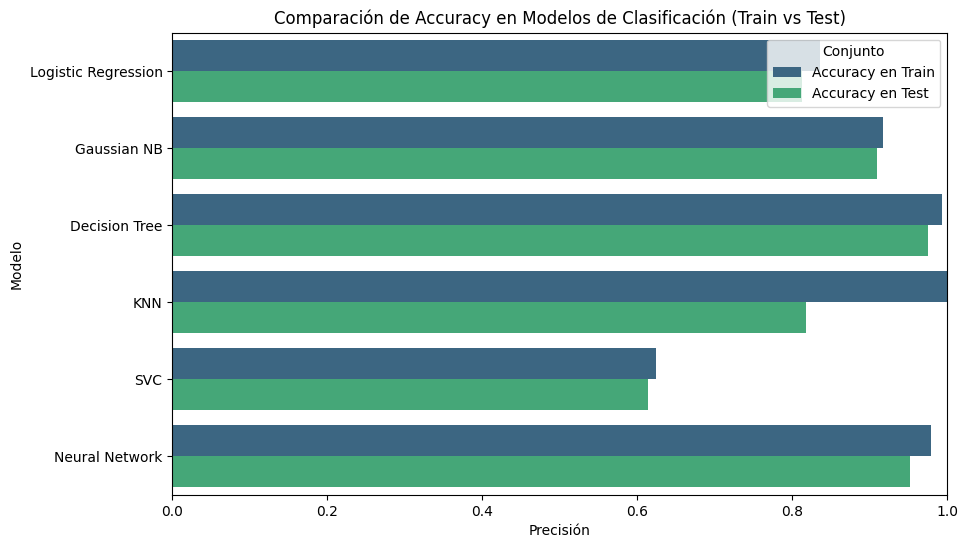

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suponiendo que tienes un DataFrame 'results_df' con las columnas:
# 'Modelo', 'Accuracy en Train' y 'Accuracy en Test'

# Reestructuramos el DataFrame para tener una fila por cada modelo y tipo de precisión
results_df_melted = pd.melt(results_df, id_vars='Modelo', value_vars=['Accuracy en Train', 'Accuracy en Test'], 
                            var_name='Conjunto', value_name='Precisión')

# Crear gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='Precisión', y='Modelo', hue='Conjunto', data=results_df_melted, palette='viridis')

# Título y límites
plt.title('Comparación de Accuracy en Modelos de Clasificación (Train vs Test)')
plt.xlim(0, 1)

# Mostrar gráfico
plt.show()
